# measure

In [1]:
import torch
from metric import to_single, inspect_in_class_sim, prepare_model_data, measure_uniformity
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.environ['CUDA_VISIBLE_DEVICES'] = "1"

## BYOL metric

In [3]:
byol, byol_ckpts, single_loader, _, config = prepare_model_data('byol', './save/byol_compare_no_schedule_2_8_19_44/', only_final=True)

sim = inspect_in_class_sim(byol, byol_ckpts, single_loader, config)

byol.cuda()
byol.eval()
byol.load_state_dict(to_single(torch.load(byol_ckpts[-1])['model']))

feats = []
with torch.no_grad():
    for img, _ in tqdm(single_loader):
        img = img.cuda()

        feat = byol.online_network(img)
        feats.append(feat)

feats = torch.cat(feats)
uniformity = measure_uniformity(feats)

print(torch.mean(sim))
print(torch.var(sim))
print(-uniformity)



Files already downloaded and verified
Files already downloaded and verified
100%|██████████| 79/79 [00:04<00:00, 15.88it/s]
tensor(0.9814)
tensor(5.2742e-06)
tensor(0.1601, device='cuda:0')


Files already downloaded and verified
Files already downloaded and verified
100%|██████████| 1/1 [00:06<00:00,  6.76s/it]


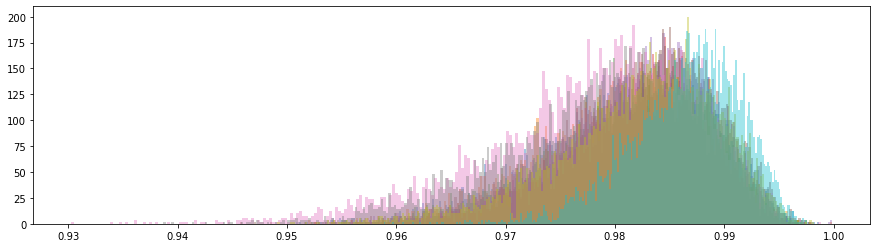

In [5]:
byol, byol_ckpts, single_loader, _, config = prepare_model_data('byol', './save/byol_compare_no_schedule_2_8_19_44/', only_final=True)

sim = inspect_in_class_sim(byol, byol_ckpts[-1:], single_loader, config, return_raw=True)

plt.figure(figsize=(15, 4))
for key in sim[0]:
    sns.distplot(sim[0][key].cpu().numpy(), bins=250, hist=True, kde=False)


## SimSiam metric

In [5]:
simsiam, simsiam_ckpts, single_loader, _, config = prepare_model_data('simsiam', './save/simsiam_compare_2_4_14_49/', only_final=True)

sim = inspect_in_class_sim(simsiam, simsiam_ckpts, single_loader, config)

simsiam.cuda()
simsiam.eval()
simsiam.load_state_dict(to_single(torch.load(simsiam_ckpts[-1])['model']))

feats = []
with torch.no_grad():
    for img, _ in tqdm(single_loader):
        img = img.cuda()

        feat = simsiam.encoder(img)
        feats.append(feat)

feats = torch.cat(feats)
uniformity = measure_uniformity(feats)

print(torch.mean(sim))
print(torch.var(sim))
print(-uniformity)

Files already downloaded and verified
Files already downloaded and verified
100%|██████████| 40/40 [00:08<00:00,  4.94it/s]
tensor(0.9583)
tensor(2.6261e-05)
tensor(0.3441, device='cuda:0')


In [7]:
simsiam, simsiam_ckpts, single_loader, _, config = prepare_model_data('simsiam', './save/simsiam_compare_2_4_14_49/', only_final=True)

sim = inspect_in_class_sim(simsiam, simsiam_ckpts[-1:], single_loader, config, return_raw=True)

plt.figure(figsize=(15, 4))
for key in sim[0]:
    sns.distplot(sim[0][key].cpu().numpy(), bins=250, hist=True, kde=False)

Files already downloaded and verified
Files already downloaded and verified
100%|██████████| 1/1 [00:06<00:00,  6.28s/it]


AttributeError: 'Rectangle' object has no property 'bin'

## MoCo metric

In [7]:
moco, moco_ckpts, single_loader, _, config = prepare_model_data('moco', './save/moco_compare_no_schedule_2_8_19_41/', only_final=True)

sim = inspect_in_class_sim(moco, moco_ckpts, single_loader, config)

moco.cuda()
moco.eval()
moco.load_state_dict(to_single(torch.load(moco_ckpts[-1])['model']))

feats = []
with torch.no_grad():
    for img, _ in tqdm(single_loader):
        img = img.cuda()

        feat = moco.query_encoder(img)
        feats.append(feat)

feats = torch.cat(feats)
uniformity = measure_uniformity(feats)

print(torch.mean(sim))
print(torch.var(sim))
print(-uniformity)

Files already downloaded and verified
Files already downloaded and verified
100%|██████████| 79/79 [00:14<00:00,  5.53it/s]
tensor(0.1235)
tensor(0.0007)
tensor(5.3260, device='cuda:0')


## SimCLR metric

In [3]:
simclr, simclr_ckpts, single_loader, multi_loader, config = prepare_model_data('simclr', './save/simclr_compare_no_schedule_2_8_19_37/', only_final=True)

sim = inspect_in_class_sim(simclr, simclr_ckpts, single_loader, config)

simclr.cuda()
simclr.eval()
simclr.load_state_dict(to_single(torch.load(simclr_ckpts[-1])['model']))

feats = []
with torch.no_grad():
    for img, _ in tqdm(single_loader):
        img = img.cuda()

        feat = simclr.encoder(img)
        feats.append(feat)

feats = torch.cat(feats)
uniformity = measure_uniformity(feats)

print(torch.mean(sim))
print(torch.var(sim))
print(-uniformity)

Files already downloaded and verified
Files already downloaded and verified
100%|██████████| 79/79 [00:05<00:00, 13.32it/s]
tensor(0.2484)
tensor(0.0041)
tensor(4.6453, device='cuda:0')


## MoCLR metric

In [4]:
moclr, moclr_ckpts, single_loader, _, config = prepare_model_data('moclr', './save/moclr_siamese_0.99_2_9_12_16/', only_final=True)

sim = inspect_in_class_sim(moclr, moclr_ckpts, single_loader, config)

moclr.cuda()
moclr.eval()
moclr.load_state_dict(to_single(torch.load(moclr_ckpts[-1])['model']))

feats = []
with torch.no_grad():
    for img, _ in tqdm(single_loader):
        img = img.cuda()

        feat = moclr.encoder(img)
        feats.append(feat)

feats = torch.cat(feats)
uniformity = measure_uniformity(feats)

print(torch.mean(sim))
print(torch.var(sim))
print(-uniformity)

Files already downloaded and verified
Files already downloaded and verified
100%|██████████| 40/40 [00:04<00:00,  8.74it/s]
tensor(0.9107)
tensor(0.0004)
tensor(0.7363, device='cuda:0')
